In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ubiquant-market-prediction/example_sample_submission.csv
/kaggle/input/ubiquant-market-prediction/example_test.csv
/kaggle/input/ubiquant-market-prediction/train.csv
/kaggle/input/ubiquant-market-prediction/ubiquant/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/ubiquant-market-prediction/ubiquant/__init__.py


In [2]:
import ubiquant
env = ubiquant.make_env()   # initialize the environment
iter_test = env.iter_test()    # an iterator which loops over the test set and sample submission

In [3]:
for (test_df, sample_prediction_df) in iter_test:
    print(test_df)
    sample_prediction_df['target'] = 0  # make your predictions here
    env.predict(sample_prediction_df)   # register your predictions

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
   row_id  investment_id       f_0       f_1       f_2       f_3       f_4  \
0  1220_1              1  0.874944  0.457875  0.962572  0.372061  0.004509   
1  1220_2              2  0.554862  0.445478  0.714034  0.891988  0.703331   

        f_5       f_6       f_7  ...     f_290     f_291     f_292     f_293  \
0  0.971304  0.097477  0.246080  ...  0.514031  0.828523  0.437697  0.810764   
1  0.264478  0.600636  0.697096  ...  0.620919  0.301540  0.687464  0.400168   

      f_294     f_295     f_296     f_297     f_298     f_299  
0  0.693963  0.186403  0.569144  0.120386  0.419603  0.936966  
1  0.908198  0.272901  0.222430  0.748324  0.858802  0.362829  

[2 rows x 302 columns]
   row_id  investment_id       f_0       f_1       f_2       f_3       f_4  \
0  1221_0              0  0.175070  0.918464  0.044379  0.505868  0.037160   
1  1221_1              1  0

* In this competition, you’ll build a model that forecasts an investment's *return rate*.
* Top entries will solve this real-world data science problem with as much *accuracy* as possible.

In [4]:
train_data = pd.read_csv("/kaggle/input/ubiquant-market-prediction/train.csv", header=0, nrows=10000, index_col="row_id")

In [5]:
train_data.head()

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
row_id,,,,,,,,,,,,,,,,,,,,,
0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


In [6]:
train_data_timeid0 = train_data[train_data["time_id"] == 0]

In [7]:
len(train_data_timeid0)

2272

In [8]:
train_data_timeid0.describe()

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
count,2272.0,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,...,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000
mean,0.0,1869.228873,-0.036879,-0.000384,-0.014136,0.011063,-0.018266,-0.001832,-0.003481,-0.006037,...,0.008712,-0.002167,-0.013043,-0.006871,0.001719,-0.019087,0.000528,-0.000938,-0.008388,-0.003732
std,0.0,1078.312362,0.923651,0.987634,0.992491,0.997750,0.940292,1.002012,0.993788,0.995930,...,0.985672,1.000417,0.980962,1.001577,0.999911,0.906861,1.000962,0.996867,0.986711,0.988941
min,0.0,1.000000,-3.464680,-5.828757,-3.025342,-1.994951,-0.688007,-0.678721,-2.553895,-2.318264,...,-4.073376,-1.095620,-1.394697,-1.220772,-1.477153,-0.743562,-1.087009,-1.882111,-2.571602,-0.920464
25%,0.0,939.750000,-0.588911,-0.361057,-0.671067,-0.615620,-0.589698,-0.484050,-0.645890,-0.882939,...,-0.625897,-1.095620,-0.673929,-1.220772,-1.060166,-0.485862,-1.087009,-0.840440,-0.830713,-0.586507
50%,0.0,1862.500000,-0.196341,0.287399,-0.011870,0.056080,-0.570096,-0.318824,-0.025785,-0.078193,...,-0.138020,0.912726,-0.268636,0.819155,0.941183,-0.285863,0.104928,-0.120518,0.133941,-0.309927
75%,0.0,2803.250000,0.348853,0.662158,0.615937,0.618766,0.314398,0.089569,0.619151,0.815703,...,0.821560,0.912726,0.381937,0.819155,0.941183,0.112935,1.296864,0.788396,0.813695,0.202692
max,0.0,3772.000000,5.679318,1.160428,3.503847,2.582596,6.938489,15.088372,2.668950,2.099965,...,3.309459,0.912726,6.669760,0.819155,0.941183,14.078161,1.296864,2.487832,2.392570,9.339707


<AxesSubplot:xlabel='row_id'>

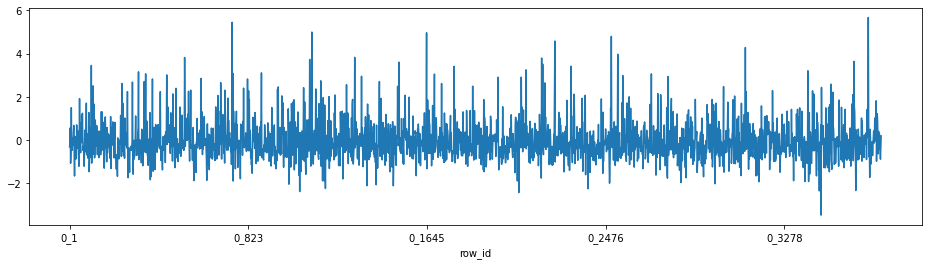

In [9]:
train_data_timeid0["target"].plot(figsize=(16, 4))

In [10]:
good_investments_timeid0 = train_data_timeid0[train_data_timeid0 >= 0.348853] #.dropna(subset=["target"])

<AxesSubplot:ylabel='Frequency'>

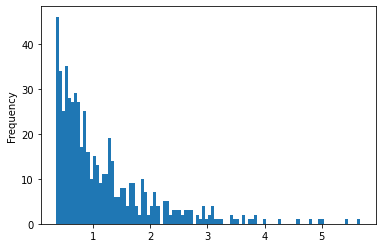

In [11]:
good_investments_timeid0["target"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

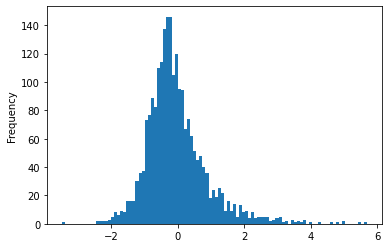

In [12]:
train_data_timeid0["target"].plot.hist(bins=100)

One obvious choice here would be to train a regression model.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
    optimizer=optimizer,
    metrics=['mae', 'mse'])
    return model

In [14]:
train_data.columns

Index(['time_id', 'investment_id', 'target', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4',
       'f_5', 'f_6',
       ...
       'f_290', 'f_291', 'f_292', 'f_293', 'f_294', 'f_295', 'f_296', 'f_297',
       'f_298', 'f_299'],
      dtype='object', length=303)

In [15]:
no_train_xmpls = int(len(train_data) * 0.4)

In [16]:
train_dataset_full = train_data.set_index("investment_id")
train_dataset = train_dataset_full.loc[train_dataset_full.index[:no_train_xmpls]].drop(columns=["time_id", "target"])
train_labels = train_dataset_full.loc[train_dataset_full.index[:no_train_xmpls]]["target"]

In [17]:
test_dataset = train_dataset_full.loc[train_dataset_full.index[no_train_xmpls: 2*no_train_xmpls]].drop(columns=["time_id", "target"])
test_labels = train_dataset_full.loc[train_dataset_full.index[no_train_xmpls: 2*no_train_xmpls]]["target"]

In [18]:
model = build_model()

model.fit(x=train_dataset, y=train_labels, epochs=100)

model.evaluate(x=test_dataset, y=test_labels)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Epoch 1/100
551/551 [==============================] - 2s 3ms/step - loss: 0.8089 - mae: 0.6363 - mse: 0.8089
Epoch 2/100
551/551 [==============================] - 1s 3ms/step - loss: 0.6886 - mae: 0.5832 - mse: 0.6886
Epoch 3/100
551/551 [==============================] - 1s 3ms/step - loss: 0.6073 - mae: 0.5487 - mse: 0.6073
Epoch 4/100
551/551 [==============================] - 1s 2ms/step - loss: 0.5362 - mae: 0.5190 - mse: 0.5362
Epoch 5/100
551/551 [==============================] - 1s 2ms/step - loss: 0.4747 - mae: 0.4890 - mse: 0.4747
Epoch 6/100
551/551 [==============================] - 1s 3ms/step - loss: 0.4223 - mae: 0.4653 - mse: 0.4223
Epoch 7/100
551/551 [==============================] - 2s 3ms/step - loss: 0.3709 - mae: 0.4379 - mse: 0.3709
Epoch 8/100
551/551 [==============================] - 2s 3ms/step - loss: 0.3300 - mae: 0.4158 - mse: 0.3300
Epoch 9/100
551/551 [==============================] - 1s 2ms/step - loss: 0.2946 - mae: 0.3937 - mse: 0.2946
Epoch 10/1

[0.06899005174636841, 0.15674757957458496, 0.06899005174636841]